<a href="https://colab.research.google.com/github/AliHasan-786/TikTok-Review-Sentiment-Analysis/blob/main/TikTok_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

data = pd.read_csv("/content/tiktok_google_play_reviews.csv")
print(data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                               reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words    5.0            0.0   
1                              Great fun app so far!    5.0            0.0   
2  The app would get a higher rating b

In [ ]:
data = data[["content", "score"]]
print(data.head())

                                             content  score
0                                           No words    5.0
1                              Great fun app so far!    5.0
2  The app would get a higher rating but I litera...    1.0
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...    5.0
4                                Pictures and record    5.0


In [ ]:
print(data.isnull().sum())

content    8
score      1
dtype: int64


In [ ]:
data = data.dropna()

In [ ]:
stopword=set(stopwords.words('english'))
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
data["content"] = data["content"].apply(clean)

In [ ]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

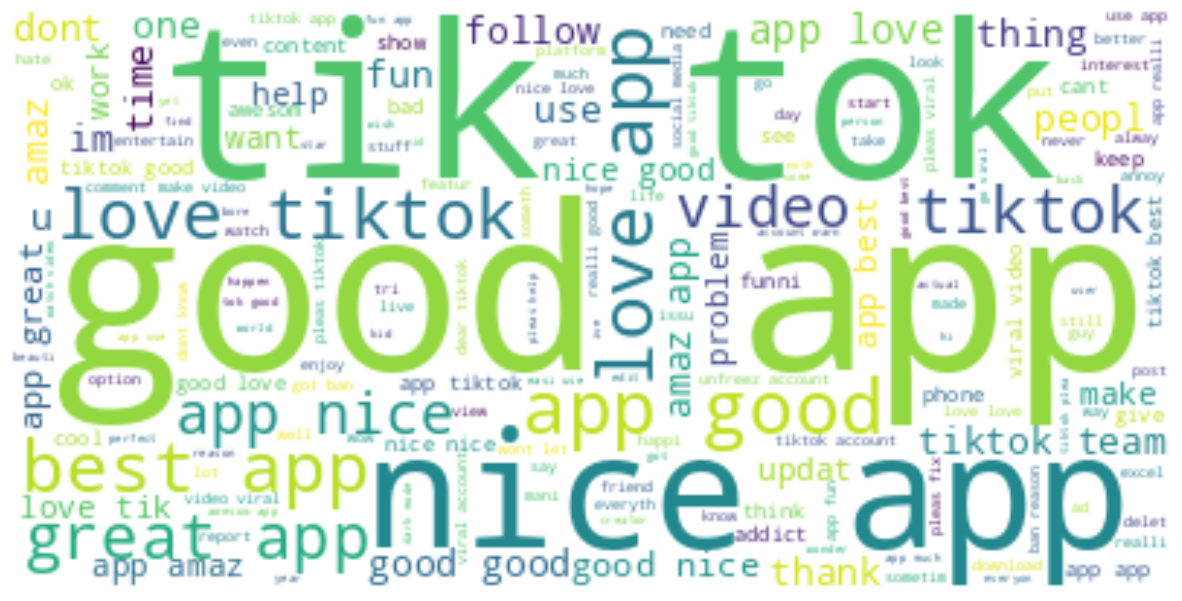

In [ ]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data ["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data ["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data ["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                             content  Positive  Negative  \
0                                               word     0.000      0.00   
1                                  great fun app far     0.787      0.00   
2  app would get higher rate liter cant sign seco...     0.000      0.07   
3             wish could give  percent rate love 💕 😘     0.633      0.00   
4                                      pictur record     0.000      0.00   

   Neutral  
0    1.000  
1    0.213  
2    0.930  
3    0.367  
4    1.000  


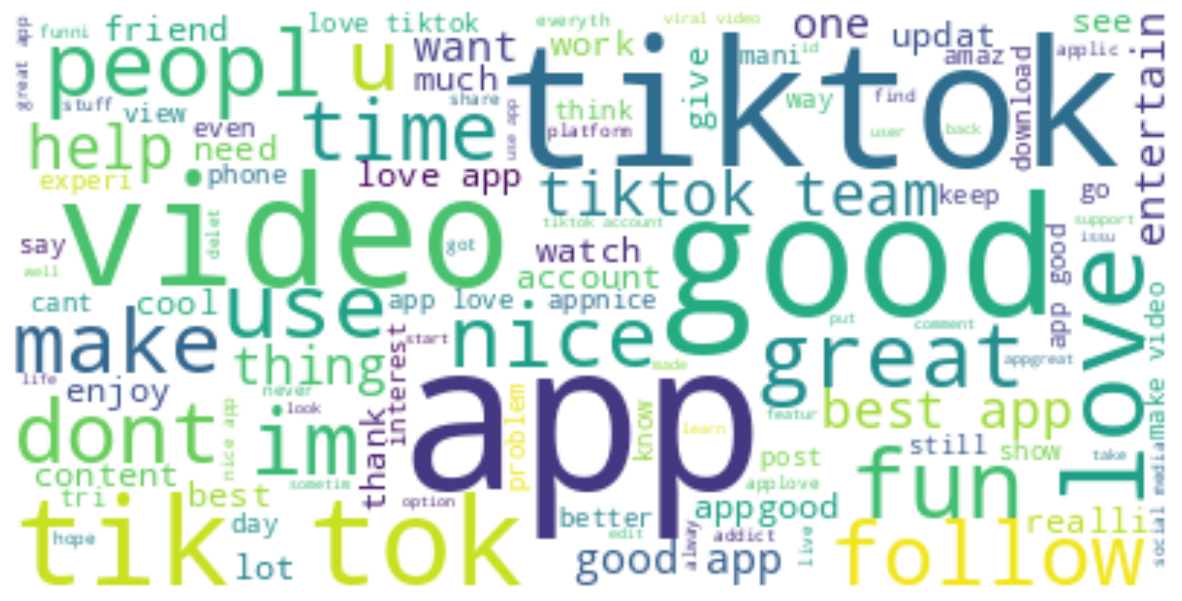

In [ ]:
positive = ''.join([i for i in data['content'][data['Positive'] > data ["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(positive)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

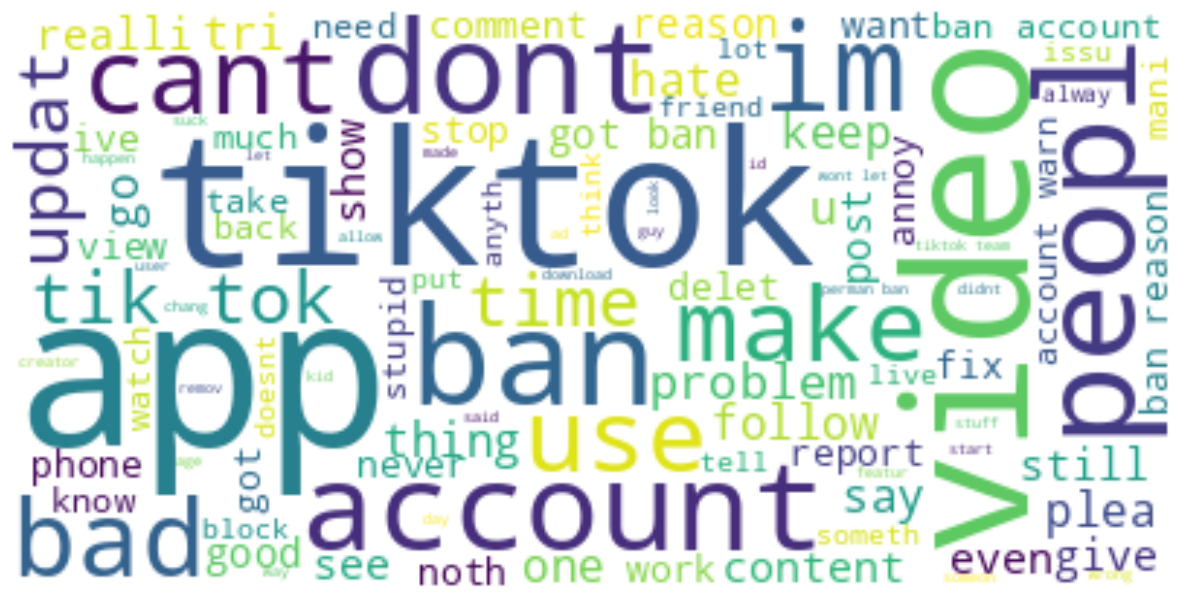

In [ ]:
negative = ''.join([i for i in data['content'][data['Negative'] > data ["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(negative)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()